In [79]:
import scipy.io as cpo
import mat4py as m4p
import mne
import matplotlib.pyplot as plt
import numpy as np

In [80]:
raw = cpo.loadmat('Data\d50c81cfullClean.mat')

In [81]:
cpo.whosmat('Data\d50c81cfullClean.mat')

[('data_iccleanedAreref', (1, 1), 'struct'),
 ('data_iccleanedBreref', (1, 1), 'struct')]

In [62]:
raw_A00 = raw['data_iccleanedAreref'][0, 0]
data_A0 = raw_A00[0][0, 0]  #sampling freq
data_A1 = raw_A00[1][0, 1]  #total number of sample
data_A2 = raw_A00[2][0, 0]  #data
data_A3 = raw_A00[3][0, 0]  #time
data_A4 = raw_A00[4]        #channel name
sj_A_chnl = [str(i) for i in data_A4.tolist()]

raw_B00 = raw['data_iccleanedBreref'][0, 0]
data_B0 = raw_B00[0][0, 0]  #sampling freq
data_B1 = raw_B00[1][0, 1]  #total number of sample
data_B2 = raw_B00[2][0, 0]  #data
data_B3 = raw_B00[3][0, 0]  #time
data_B4 = raw_B00[4]        #channel name
sj_B_chnl = [str(i) for i in data_B4.tolist()]

In [66]:
info_A = mne.create_info(ch_names= sj_A_chnl, sfreq= data_A0)
sj_A = mne.io.RawArray(data_A2, info_A)
info_B = mne.create_info(ch_names= sj_B_chnl, sfreq= data_B0)
sj_B = mne.io.RawArray(data_B2, info_B)

Creating RawArray with float64 data, n_channels=32, n_times=311200
    Range : 0 ... 311199 =      0.000 ...   622.398 secs
Ready.
Creating RawArray with float64 data, n_channels=32, n_times=311200
    Range : 0 ... 311199 =      0.000 ...   622.398 secs
Ready.


In [67]:
sj_A.plot()
sj_B.plot()

Effective window size : 4.096 (s)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8\1299128135.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  sj_A_psd.plot(picks=sj_A_chnl[2])
d:\mne-python\1.5.1_0\Lib\site-packages\mne\viz\utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


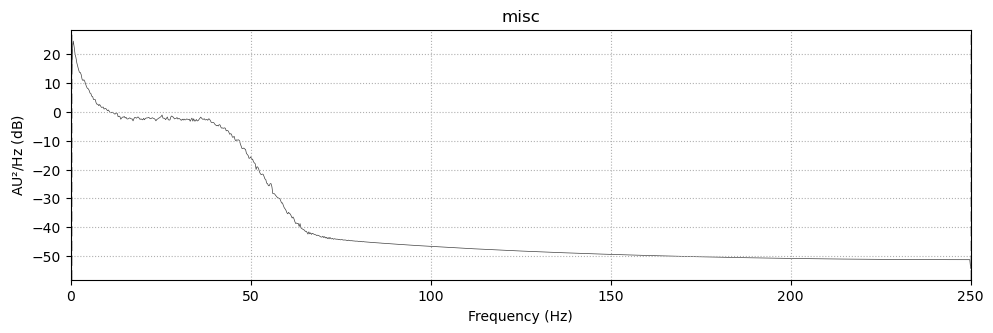

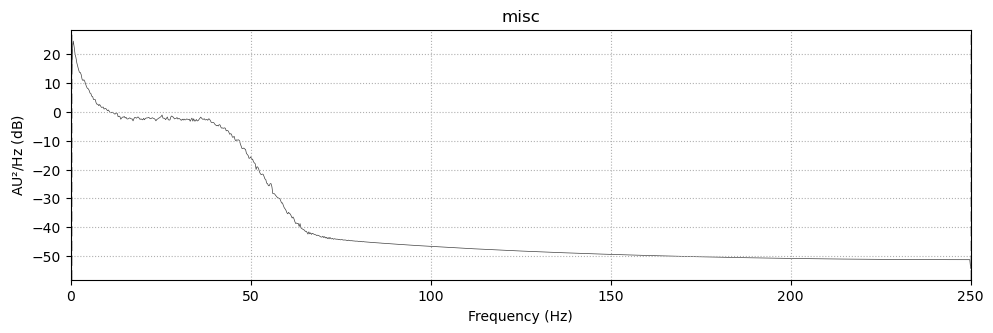

In [78]:
sj_A_psd = sj_A.compute_psd( picks= sj_A_chnl)
sj_A_psd.plot(picks=sj_A_chnl[2])


In [151]:
# del dummy
# dummy = [str(i) for i in sj_A_chnl][0]
# dummy = raw_A00[5][0, 0]
# dummy